index

gender: 성별

car: 차량 소유 여부

reality: 부동산 소유 여부

child_num: 자녀 수

income_total: 연간 소득

income_type: 소득 분류
							['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

edu_type: 교육 수준
							['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

family_type: 결혼 여부
							['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

house_type: 생활 방식
							['Municipal apartment', 'House / apartment', 'With parents',

							 'Co-op apartment', 'Rented apartment', 'Office apartment']

DAYS_BIRTH: 출생일
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

DAYS_EMPLOYED: 업무 시작일
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미

							양수 값은 고용되지 않은 상태를 의미함

FLAG_MOBIL: 핸드폰 소유 여부

work_phone: 업무용 전화 소유 여부

phone: 전화 소유 여부

email: 이메일 소유 여부

occyp_type: 직업 유형

family_size: 가족 규모

begin_month: 신용카드 발급 월
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
							=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함



In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import seaborn.objects as so




train_set = pd.read_csv('/Users/leejungbin/Desktop/codes/ai_basic/train.csv').fillna("No")
# train_set.info()
# train_set = train_set[train_set.DAYS_EMPLOYED < 0]
test_set = pd.read_csv('/Users/leejungbin/Desktop/codes/ai_basic/test.csv').fillna("No")
submission = pd.read_csv('/Users/leejungbin/Desktop/codes/ai_basic/sample_submission.csv')


title_db = ['gender', 'car', 'reality', 'child_num', 'income_total', 
'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'occyp_type', 
'family_size', 'begin_month', 'credit'] 

# 데이터프레임.groupby(그룹이되는컬럼)[계산하고 싶은 컬럼].집계함수()
# 데이터프레임.groupby([컬럼1,컬럼2]).agg({계산하고싶은컬럼명1 : 집계함수 , 계산하고싶은컬럼명2 : 집계함수})

train_set['DAYS_BIRTH'] = round(abs(train_set['DAYS_BIRTH'])/365).astype(np.int64)
train_set['DAYS_EMPLOYED'] = round(abs(train_set['DAYS_EMPLOYED'])/365).astype(np.int64)
train_set['begin_month'] = round(abs(train_set['begin_month'])/12).astype(np.int64) # year
train_set['income_total'] = train_set['income_total'].astype(np.int64)
train_set['family_size'] = train_set['family_size'].astype(np.int64)
train_set['credit'] = train_set['credit'].astype(np.int64)



test_set['DAYS_BIRTH'] = round(abs(test_set['DAYS_BIRTH'])/365).astype(np.int64)
test_set['DAYS_EMPLOYED'] = round(abs(test_set['DAYS_EMPLOYED'])/365).astype(np.int64)
test_set['begin_month'] = round(abs(test_set['begin_month'])/12).astype(np.int64) # year
test_set['income_total'] = test_set['income_total'].astype(np.int64)
test_set['family_size'] = test_set['family_size'].astype(np.int64)

# 머신러닝 알고리즘은 문자열 데이터 속성을 입력받지 않으며 모든 데이터는 숫자형으로 표현되어야 합니다.
# 문자열로 구성된 범주형 속성 모두 숫자 값으로 변환/인코딩 하겠습니다.

# List of columns you want to encode
# List of columns you want to one-hot encode
columns_to_encode = ["gender","car","reality","income_type", "edu_type", 
                    "family_type", "house_type", "occyp_type"]

# Apply one-hot encoding to training and test data
train_set = pd.get_dummies(train_set, columns=columns_to_encode)
test_set = pd.get_dummies(test_set, columns=columns_to_encode)

train_set['ability'] = train_set['income_total'] / (train_set['DAYS_BIRTH'] + train_set['DAYS_EMPLOYED'])
train_set['income_mean'] = train_set['income_total'] / train_set['family_size']

test_set['ability'] = test_set['income_total'] / (test_set['DAYS_BIRTH'] + test_set['DAYS_EMPLOYED'])
test_set['income_mean'] = test_set['income_total'] / test_set['family_size']

cols = ['FLAG_MOBIL', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
train_set.drop(cols, axis=1, inplace=True)
test_set.drop(cols, axis=1, inplace=True)

In [48]:
# from sklearn import preprocessing

# label_encoder=preprocessing.LabelEncoder()

# # train_set=train_set.drop('occyp_type', axis=1)
# # test_set=test_set.drop('occyp_type', axis=1)

# train_set['gender'] = train_set['gender'].replace(['F','M'],[0,1])
# test_set['gender'] = test_set['gender'].replace(['F','M'],[0,1])
# train_set['car'] = train_set['car'].replace(['N','Y'],[0,1])
# test_set['car'] = test_set['car'].replace(['N','Y'],[0,1])
# train_set['reality'] = train_set['reality'].replace(['N','Y'],[0,1])
# test_set['reality'] = test_set['reality'].replace(['N','Y'],[0,1])

# train_set['income_total'] = train_set['income_total']/10000 
# test_set['income_total'] = test_set['income_total']/10000
# ##############################################################3
# print(train_set['income_total'].value_counts(bins=10,sort=False))
# train_set['income_total'].plot(kind='hist',bins=50,density=True)

# count, bin_dividers =np.histogram(train_set['income_total'], bins=7)
# bin_names=['소득'+str(i) for i in range(7) ]
# #bin_dividers는 train기준!!
# train_set['income_total']=pd.cut(x=train_set['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)
# test_set['income_total']=pd.cut(x=test_set['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)



# train_set['income_type']=label_encoder.fit_transform(train_set['income_type'])
# test_set['income_type']=label_encoder.transform(test_set['income_type'])
# ########################################################################
# train_set['edu_type']=label_encoder.fit_transform(train_set['edu_type'])
# test_set['edu_type']=label_encoder.transform(test_set['edu_type'])
# ########################################################################
# train_set['family_type']=label_encoder.fit_transform(train_set['family_type'])
# test_set['family_type']=label_encoder.transform(test_set['family_type'])
# ########################################################################
# train_set['house_type']=label_encoder.fit_transform(train_set['house_type'])
# test_set['house_type']=label_encoder.transform(test_set['house_type'])
# ########################################################################
# train_set['income_total']=label_encoder.fit_transform(train_set['income_total'])
# test_set['income_total']=label_encoder.fit_transform(test_set['income_total'])


# def make_bin(variable, n):
#     train_set[variable]=-train_set[variable]
#     test_set[variable]=-test_set[variable]
#     count, bin_dividers =np.histogram(train_set[variable], bins=n) #train의 구간화를 적용
#     bin_names=[str(i) for i in range(n)]
#     train_set[variable]=pd.cut(x=train_set[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
#     test_set[variable]=pd.cut(x=test_set[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
#     test_set[variable].fillna(str(0), inplace=True) #test에는 없는 것을 임의의 값으로 채움
#     ##########################################################
#     train_set[variable]=label_encoder.fit_transform(train_set[variable])
#     test_set[variable]=label_encoder.transform(test_set[variable])


# make_bin('DAYS_BIRTH', n=10)
# make_bin('DAYS_EMPLOYED', n=6)
# make_bin('begin_month', n=4)


# train_set

In [50]:
from pandas_profiling import ProfileReport

ProfileReport(train_set)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import RobustScaler
# import pandas as pd
# import numpy as np

# RS = RobustScaler()

# X_train = train_set.drop(columns = 'credit')
# X_test = test_set
# #종속변수 분리
# y_train = train_set['credit']

# X_train_rs = RS.fit_transform(X_train)
# X_train_rs

# data = pd.DataFrame(X_train_rs, columns = X_train.columns)
# data

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

X = train_set.drop(columns = 'credit')
y = train_set['credit']

x_train , x_valid, y_train, y_valid = train_test_split(X,y, stratify = y, test_size = 0.3)
#사이킷런의 DecisionTreeClassifier로 모델 학습

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

pred_1 = dt.predict(x_valid)
valid_cm_1 = confusion_matrix(y_valid, pred_1)
valid_acc_1 = accuracy_score(y_valid, pred_1)
valid_prc_1 = precision_score(y_valid, pred_1, average='weighted')
valid_rcll_1 = recall_score(y_valid, pred_1, average='weighted')
valid_f1_1 = f1_score(y_valid, pred_1, average='weighted')
print(valid_cm_1)
print('\n')
print('정확도\t{}%'.format(round(valid_acc_1 *100,2)))
print('정밀도\t{}%'.format(round(valid_prc_1 *100,2)))
print('재현율\t{}%'.format(round(valid_rcll_1 *100,2)))

[[ 225  229  513]
 [ 241  704  935]
 [ 584 1027 3480]]


정확도	55.54%
정밀도	56.41%
재현율	55.54%


In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(            n_estimators=50, ## 붓스트랩 샘플 개수 또는 base_estimator 개수
            criterion='entropy', ## 불순도 측도
            max_depth=5, ## 개별 나무의 최대 깊이
            max_features='sqrt', ## 매 분리시 랜덤으로 뽑을 변수 개수
            max_samples=1.0, ## 붓스트랩 샘플 비율 => 1이면 학습데이터를 모두 샘플링한다.
            bootstrap=True, ## 복원 추출,  False이면 비복원 추출
            oob_score=True, ## Out-of-bag 데이터를 이용한 성능 계산
            random_state=100
        )
pred_2 =rf.fit(x_train, y_train).predict(x_valid)
print("정확도 : ", rf.score(x_valid, y_valid))

valid_cm_2 = confusion_matrix(y_valid, pred_2)
valid_acc_2 = accuracy_score(y_valid, pred_2)
valid_prc_2 = precision_score(y_valid, pred_2, average='weighted')
valid_rcll_2 = recall_score(y_valid, pred_2, average='weighted')
valid_f1_2 = f1_score(y_valid, pred_2, average='weighted')
print(valid_cm_2)
print('\n')
print('정확도\t{}%'.format(round(valid_acc_2 *100,2)))
print('정밀도\t{}%'.format(round(valid_prc_2 *100,2)))
print('재현율\t{}%'.format(round(valid_rcll_2 *100,2)))

정확도 :  0.6417233560090703
[[   0    0  967]
 [   0    3 1877]
 [   0    0 5091]]


정확도	64.17%
정밀도	64.83%
재현율	64.17%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
pred_3 =xgb.fit(x_train, y_train).predict(x_valid)
print("정확도 : ", xgb.score(x_valid, y_valid))

valid_cm_3 = confusion_matrix(y_valid, pred_3)
valid_acc_3 = accuracy_score(y_valid, pred_3)
valid_prc_3 = precision_score(y_valid, pred_3, average='weighted')
valid_rcll_3 = recall_score(y_valid, pred_3, average='weighted')
valid_f1_3 = f1_score(y_valid, pred_3, average='weighted')
print(valid_cm_3)
print('\n')
print('정확도\t{}%'.format(round(valid_acc_3 *100,2)))
print('정밀도\t{}%'.format(round(valid_prc_3 *100,2)))
print('재현율\t{}%'.format(round(valid_rcll_3 *100,2)))

정확도 :  0.6749811035525322
[[  52  157  758]
 [  31  537 1312]
 [  42  280 4769]]


정확도	67.5%
정밀도	62.85%
재현율	67.5%


In [54]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
pred_4 =lgbm.fit(x_train, y_train).predict(x_valid)
print("정확도 : ", lgbm.score(x_valid, y_valid))

valid_cm_4 = confusion_matrix(y_valid, pred_4)
valid_acc_4 = accuracy_score(y_valid, pred_4)
valid_prc_4 = precision_score(y_valid, pred_4, average='weighted')
valid_rcll_4 = recall_score(y_valid, pred_4, average='weighted')
valid_f1_4 = f1_score(y_valid, pred_4, average='weighted')
print(valid_cm_4)
print('\n')
print('정확도\t{}%'.format(round(valid_acc_4 *100,2)))
print('정밀도\t{}%'.format(round(valid_prc_4 *100,2)))
print('재현율\t{}%'.format(round(valid_rcll_4 *100,2)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 18519, number of used features: 54
[LightGBM] [Info] Start training from score -2.105647
[LightGBM] [Info] Start training from score -1.440152
[LightGBM] [Info] Start training from score -0.444193
정확도 :  0.6768707482993197
[[  18  166  783]
 [   6  534 1340]
 [  12  258 4821]]


정확도	67.69%
정밀도	63.82%
재현율	67.69%


In [55]:
from sklearn.metrics import log_loss

pred_1_1 = dt.predict_proba(x_valid)
pred_2_1 =rf.fit(x_train, y_train).predict_proba(x_valid)
pred_3_1 =xgb.fit(x_train, y_train).predict_proba(x_valid)
pred_4_1 =lgbm.fit(x_train, y_train).predict_proba(x_valid)


valid_1 = log_loss(y_valid, pred_1_1)
valid_2 = log_loss(y_valid, pred_2_1)
valid_3 = log_loss(y_valid, pred_3_1)
valid_4 = log_loss(y_valid, pred_4_1)

print(f'의사결정나무 : {valid_1}')
print(f'랜덤포레스트: {valid_2}')
print(f'XGBoost : {valid_3}')
print(f'LightGBM : {valid_4}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 18519, number of used features: 54
[LightGBM] [Info] Start training from score -2.105647
[LightGBM] [Info] Start training from score -1.440152
[LightGBM] [Info] Start training from score -0.444193
의사결정나무 : 15.354918354451977
랜덤포레스트: 0.8631903305935028
XGBoost : 0.8134118387184996
LightGBM : 0.8096323886042575


In [56]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# CatBoost Classifier 모델 생성
catboost = CatBoostClassifier()

# 학습 데이터로 모델 훈련 후 검증 데이터에 대한 예측 수행
catboost.fit(x_train, y_train)
pred_4 = catboost.predict(x_valid)

# 검증 데이터에 대한 평가 지표 계산
valid_cm_4 = confusion_matrix(y_valid, pred_4)
valid_acc_4 = accuracy_score(y_valid, pred_4)
valid_prc_4 = precision_score(y_valid, pred_4, average='weighted')
valid_rcll_4 = recall_score(y_valid, pred_4, average='weighted')
valid_f1_4 = f1_score(y_valid, pred_4, average='weighted')

# 평가 지표 및 혼동 행렬 출력
print(valid_cm_4)
print('\n')
print('정확도\t{}%'.format(round(valid_acc_4 * 100, 2)))
print('정밀도\t{}%'.format(round(valid_prc_4 * 100, 2)))
print('재현율\t{}%'.format(round(valid_rcll_4 * 100, 2)))


Learning rate set to 0.091827
0:	learn: 1.0514193	total: 61.5ms	remaining: 1m 1s
1:	learn: 1.0140455	total: 63.7ms	remaining: 31.8s
2:	learn: 0.9841017	total: 68.9ms	remaining: 22.9s
3:	learn: 0.9596378	total: 74.6ms	remaining: 18.6s
4:	learn: 0.9395740	total: 79.4ms	remaining: 15.8s
5:	learn: 0.9230617	total: 84.7ms	remaining: 14s
6:	learn: 0.9093288	total: 89.7ms	remaining: 12.7s
7:	learn: 0.8979076	total: 94.1ms	remaining: 11.7s
8:	learn: 0.8882922	total: 98.6ms	remaining: 10.9s
9:	learn: 0.8801465	total: 103ms	remaining: 10.2s
10:	learn: 0.8734505	total: 107ms	remaining: 9.65s
11:	learn: 0.8678399	total: 111ms	remaining: 9.17s
12:	learn: 0.8629439	total: 117ms	remaining: 8.85s
13:	learn: 0.8590192	total: 122ms	remaining: 8.57s
14:	learn: 0.8554987	total: 126ms	remaining: 8.27s
15:	learn: 0.8526077	total: 130ms	remaining: 8.02s
16:	learn: 0.8498967	total: 135ms	remaining: 7.8s
17:	learn: 0.8477457	total: 139ms	remaining: 7.6s
18:	learn: 0.8457618	total: 144ms	remaining: 7.43s
19:	le

[367, 2917, 3672, 3836, 3741, 3148, 2888, 2807, 2366, 715, 0]


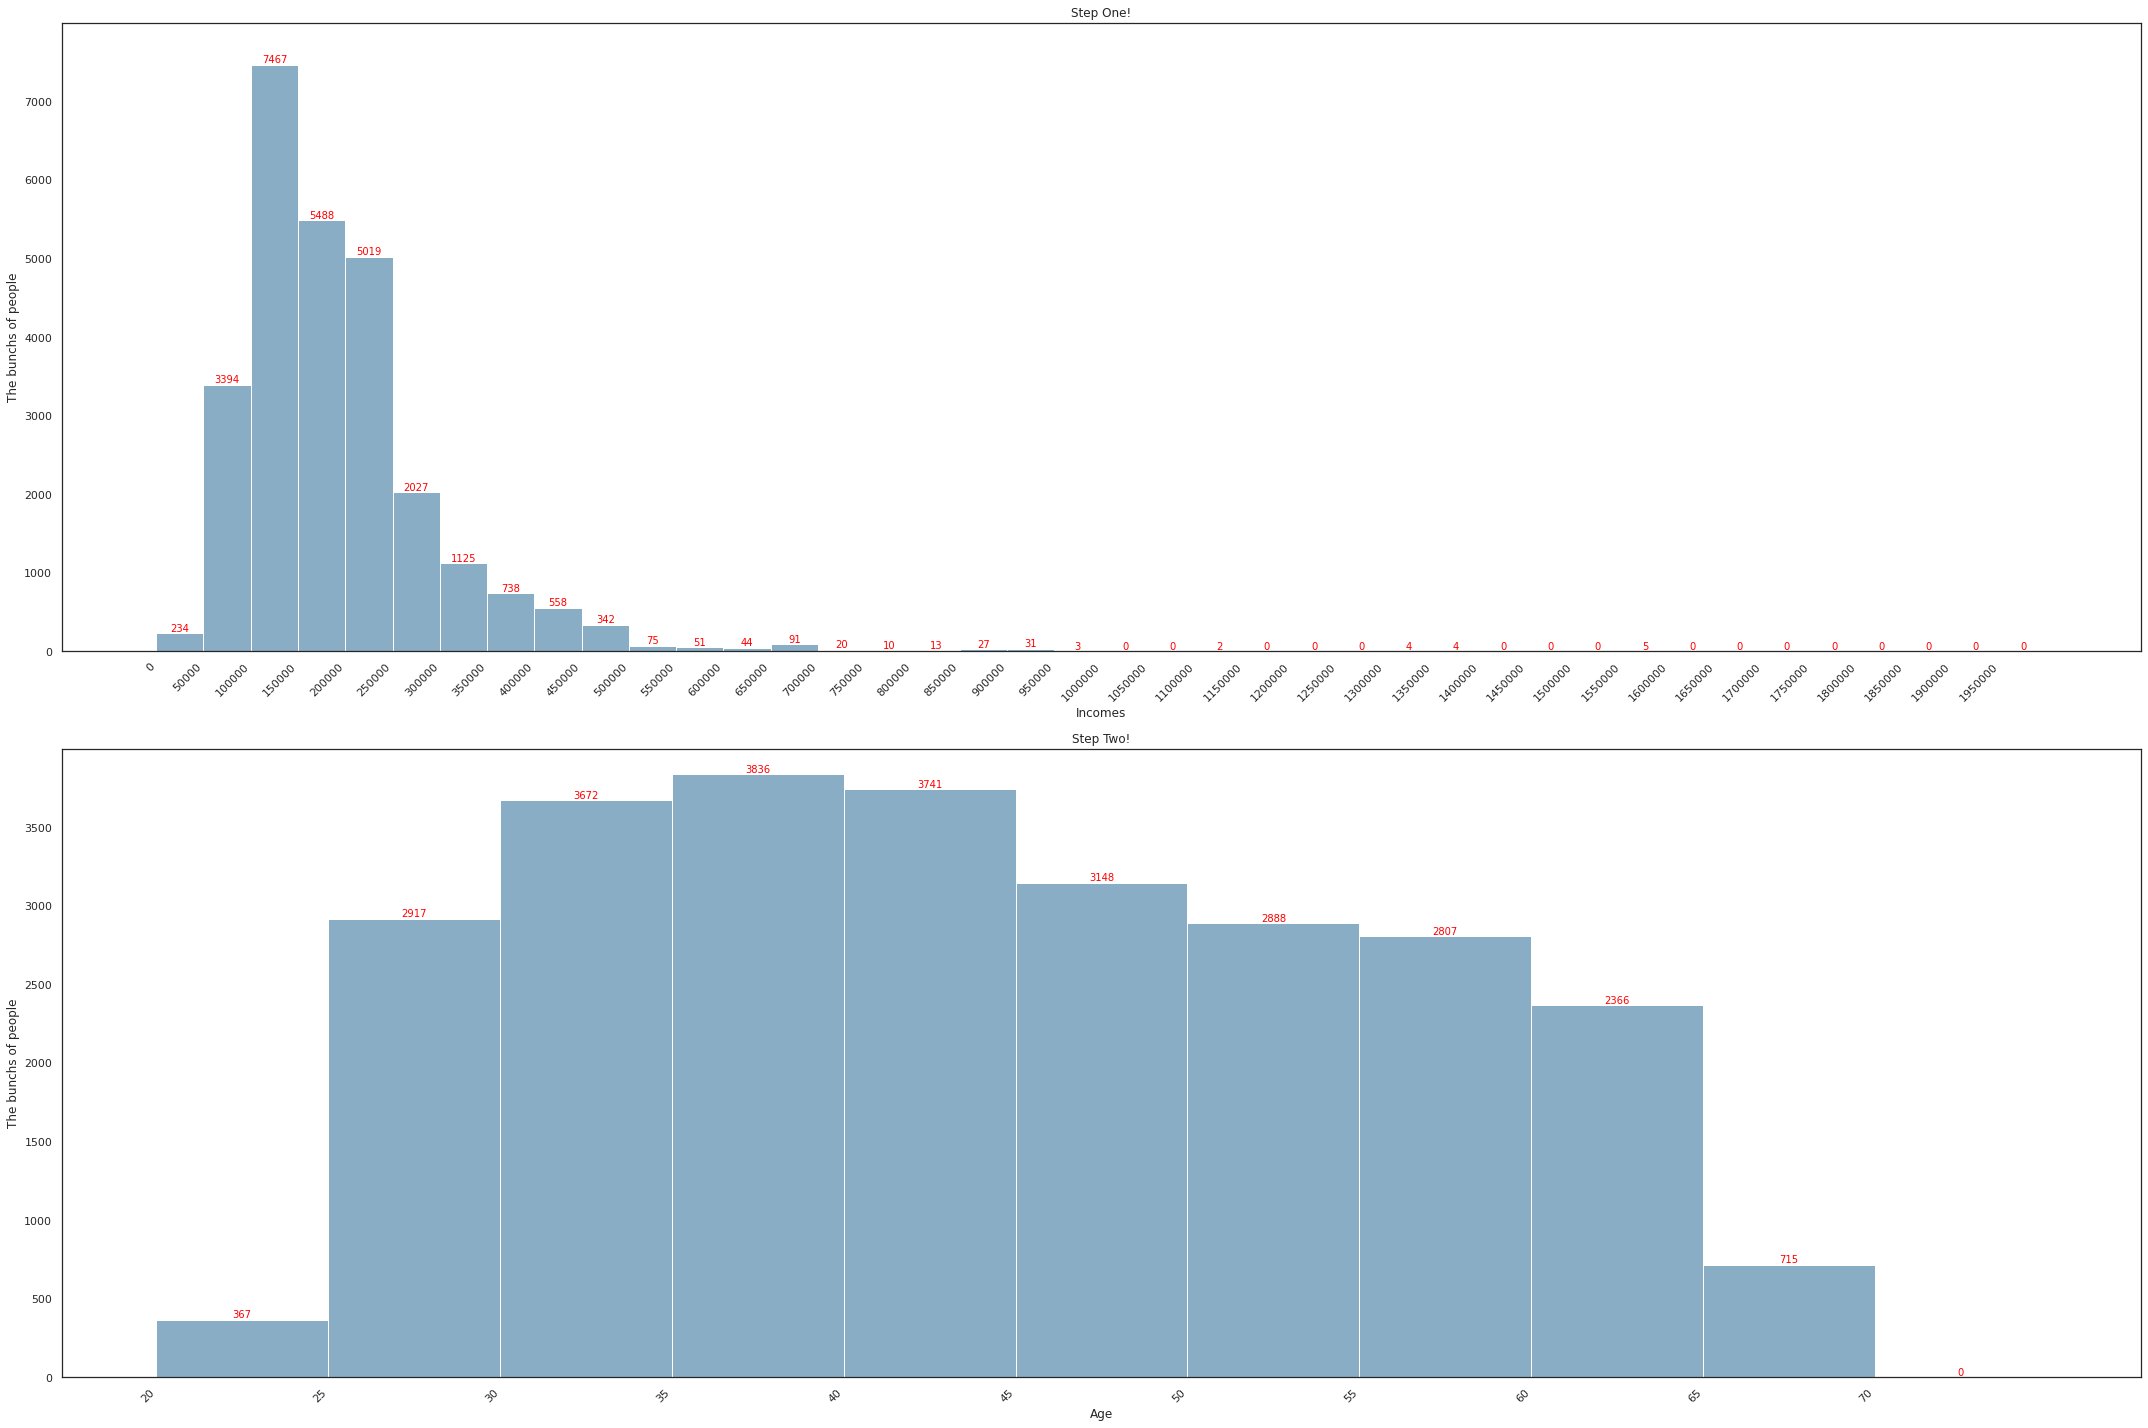

In [320]:
def counter(name):
    return train_set.groupby(name)['index'].count()

def birthRanger():
    cnt = []
    for i in range(20, 71, 5):
        temp = train_set[(train_set["DAYS_BIRTH"] >= i) & (train_set["DAYS_BIRTH"] < i+5)].groupby(["DAYS_BIRTH"])["index"].count().sum()
        cnt.append(temp)
    return cnt

def incomeRanger():

    cnt = []
    for i in range(0, 2000001, 50000):
        tempy = train_set[(train_set["income_total"] >= i) & (train_set["income_total"] <= i + 50000)].groupby(["income_total"])["index"].count().sum()
        # if tempy == 0:
        #     # print("%d to %d is empty" % (i, i + 50000))
        #     pass 
        # else:
        cnt.append(tempy)
    return cnt 


plt.rc('axes', unicode_minus=False)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(30, 20))
sns.set_palette('twilight')

set_title = train_set.columns[1:]

xRange = [i for i in range(0, 2000000, 50000)]

# Recalculate yMoney based on the new xRange
yMoney = incomeRanger()[:len(xRange)]

x_labels = [str(x) for x in xRange]

# Set y ticks and labels
y_ticks = np.arange(0, 8000, 1000)
y_labels = [str(y) for y in y_ticks]

bars = ax1.bar(xRange, yMoney, width=50000, align='edge')

# Modify the number of ticks shown to match the length of xRange
ticks_to_show = len(xRange)// 40  # Adjust this as needed
xtick_positions = xRange[::ticks_to_show]
xtick_labels = x_labels[::ticks_to_show]

ax1.set_xticks(xtick_positions)
ax1.set_xticklabels(xtick_labels, rotation=45, ha='right')
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(y_labels)
ax1.set_xlabel('Incomes')
ax1.set_ylabel('The bunchs of people')
ax1.set_ylim(0, 8000)

# Display y values on top of each bar
for bar, count in zip(bars, yMoney):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
            ha='center', va='bottom', fontsize=10, color='red')

ax1.set_title('Step One!')
plt.tight_layout()



xRan = [i for i in range(20,71,5)]
yBth = birthRanger()[:len(xRan)]

print(yBth)
x_labels = [str(x) for x in xRan]

# Set y ticks and labels
y_ticks = np.arange(0, 4000, 500)
y_labels = [str(y) for y in y_ticks]

bars = ax2.bar(xRan, yBth, width=5, align='edge')

# Modify the number of ticks shown to match the length of xRan
ticks_to_show = len(xRan)// 10  # Adjust this as needed
xtick_positions = xRan[::ticks_to_show]
xtick_labels = x_labels[::ticks_to_show]

ax2.set_xticks(xtick_positions)
ax2.set_xticklabels(xtick_labels, rotation=45, ha='right')
ax2.set_yticks(y_ticks)
ax2.set_yticklabels(y_labels)
ax2.set_xlabel('Age')
ax2.set_ylabel('The bunchs of people')
ax2.set_ylim(0, 4000)

# Display y values on top of each bar
for bar, count in zip(bars, yBth):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
            ha='center', va='bottom', fontsize=10, color='red')

ax2.set_title('Step Two!')
plt.tight_layout()

plt.show()

index gender car reality  child_num  income_total           income_type  \
0     26457      M   Y       N          0        112500             Pensioner   
1     26458      F   N       Y          0        135000         State servant   
2     26459      F   N       Y          0         69372               Working   
3     26460      M   Y       N          0        112500  Commercial associate   
4     26461      F   Y       Y          0        225000         State servant   
...     ...    ...  ..     ...        ...           ...                   ...   
9995  36452      F   Y       Y          0        202500               Working   
9996  36453      M   Y       Y          0        202500               Working   
9997  36454      F   N       Y          0        292500               Working   
9998  36455      F   Y       N          0        180000  Commercial associate   
9999  36456      F   N       Y          0        270000               Working   

                           edu_type     family_type         house_type  \
0     Secondary / secondary special  Civil marriage  House / apartment   
1                  Higher education         Married  House / apartment   
2     Secondary / secondary special         Married  House / apartment   
3     Secondary / secondary special         Married  House / apartment   
4                  Higher education         Married  House / apartment   
...                             ...             ...                ...   
9995              Incomplete higher         Married  House / apartment   
9996  Secondary / secondary special  Civil marriage  House / apartment   
9997  Secondary / secondary special         Married  House / apartment   
9998  Secondary / secondary special         Married  House / apartment   
9999               Higher education         Married  House / apartment   

      DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0             60           1001           1           0      1      0   
1             52             24           1           0      1      0   
2             44              1           1           1      1      0   
3             53              7           1           1      0      0   
4             49             26           1           1      0      0   
...          ...            ...         ...         ...    ...    ...   
9995          51             15           1           1      1      0   
9996          30              4           1           1      0      0   
9997          58             38           1           0      0      0   
9998          45              3           1           0      1      0   
9999          25              1           1           0      0      1   

          occyp_type  family_size  begin_month  
0                 No            2            5  
1         Core staff            2            3  
2           Laborers            2            3  
3            Drivers            2            3  
4           Managers            2            1  
...              ...          ...          ...  
9995     Accountants            2            2  
9996        Laborers            2            3  
9997  Medicine staff            2            5  
9998              No            2            3  
9999        Laborers            2            1  

[10000 rows x 19 columns]

In [97]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import accuracy_score
# import xgboost
# from lightgbm import LGBMClassifier

# rf = RandomForestClassifier()
# rf.fit(train_x, train_y)

# train_dum = pd.get_dummies(train_x,drop_first = True)
# test_dum = pd.get_dummies(train_y,drop_first = True)

# xgc = xgboost.XGBClassifier() 
# xgc.fit(train_dum, train_y)

# lgb = LGBMClassifier()
# lgb.fit(train_dum, train_y)

# pred = rf.predict_proba(test_dum)
# pred = xgc.predict_proba(test_dum)
# pred = lgb.predict_proba(test_dum)

# submission.loc[:,1:]=pred
# submission.to_csv('Stage5.csv', index=False)
# print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)) )
# print("OOB 샘플의 정확도: {:.3f}".format(model.oob_score_) )
# n_estimator : 사용할 결정트리의 개수
# min_sample_leaf : 가장 마지막 노드에 존재해야 하는 샘플의 최소 개수
# max_features : 결정트리 학습 시 사용할 피쳐 개수, auto일 시 원래 피쳐 개수에 루트를 씌운 값 사용
# max_samples : 샘플할 데이터의 개수 
# random_state : 재현성을 위한 시드 값
# n_jobs 학습시 사용한 쓰레드의 개수, -1일 결우 사용가능한 모든 쓰레드 사용해 학습

(26457, 20)